<a href="https://colab.research.google.com/github/01SakuraAyane29/Machine-Learning-Models/blob/master/NeuralNetwork_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kc_house_data.csv to kc_house_data.csv
User uploaded file "kc_house_data.csv" with length 2515206 bytes


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import keras
import time
import datetime

data = pd.read_csv('kc_house_data.csv',sep=',')
y_data = data['price']
x_data = data.drop(columns = ['id','date','price'])

date = data['date']

date = date.apply(lambda x: time.strptime(x[2:4]+x[4:6]+x[6:8], '%y%m%d'))

date = date.apply(lambda x: (time.mktime(datetime.datetime.now().timetuple())
                             -time.mktime(x))/86400)

x_data.insert(1,'date',date)

from sklearn.model_selection import train_test_split

x_data.dropna(axis = 0)
y_data.dropna(axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

Using TensorFlow backend.


In [0]:
alldata = np.hstack((x_train,y_train.reshape(-1,1)))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [0]:
print(alldata[,0:18])

SyntaxError: ignored

features = Input(shape=(19,))
x = Dense(8,activation = 'relu', kernel_initializer = 'glorot_unifrom')(features)
price = dense(1,kernel_initializer = 'glorot_uniform')(x)

my_model = Model(inputs = [features],outputs = [price])
my_model.compile(loss = 'mae',optimizer = 'adam')

NUM_EPOCHS = 20
BATCH_SIZE = 10

history = my_model.fit(x_train,y_train, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, validation_split = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train.reshape(-1,1))

model = Sequential()
model.add(Dense(32,input_shape=(19,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(optimizer = 'sgd',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 20
BATCH_SIZE = 10

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)


Train on 11584 samples, validate on 2896 samples
Epoch 1/20
11584/11584 [==============================] - 2s 148us/step - loss: 0.4003 - val_loss: 0.3129
Epoch 2/20
11584/11584 [==============================] - 2s 136us/step - loss: 0.3063 - val_loss: 0.2971
Epoch 3/20
11584/11584 [==============================] - 2s 132us/step - loss: 0.2896 - val_loss: 0.2836
Epoch 4/20
11584/11584 [==============================] - 2s 133us/step - loss: 0.2791 - val_loss: 0.2781
Epoch 5/20
11584/11584 [==============================] - 2s 133us/step - loss: 0.2706 - val_loss: 0.2799
Epoch 6/20
11584/11584 [==============================] - 2s 133us/step - loss: 0.2616 - val_loss: 0.2646
Epoch 7/20
11584/11584 [==============================] - 2s 133us/step - loss: 0.2542 - val_loss: 0.2615
Epoch 8/20
11584/11584 [==============================] - 2s 132us/step - loss: 0.2464 - val_loss: 0.2425
Epoch 9/20
11584/11584 [==============================] - 2s 134us/step - loss: 0.2376 - val_loss: 0.24

In [0]:
from sklearn.preprocessing import MaxAbsScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

maxscaler = MaxAbsScaler()

x_train = maxscaler.fit_transform(x_train)

mymodel = Sequential()
mymodel.add(Dense(8,activation = 'relu',input_shape=(19,)))
mymodel.add(Dense(16))
mymodel.add(Dense(32,activation = 'relu'))
mymodel.add(Dense(64))
mymodel.add(Dense(128,activation = 'relu'))
mymodel.add(Dense(256,activation = 'sigmoid'))
mymodel.add(Dense(128))
mymodel.add(Dense(64))
mymodel.add(Dense(32))
mymodel.add(Dense(1))
mymodel.compile(optimizer = 'adam',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 100
BATCH_SIZE = 10

history = mymodel.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)


In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

maxscaler = MinMaxScaler()

x_train = maxscaler.fit_transform(x_train)

model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape=(19,)))
model.add(Dense(16))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 100
BATCH_SIZE = 10

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)

Train on 11584 samples, validate on 2896 samples
Epoch 1/100
11584/11584 [==============================] - 3s 288us/step - loss: 182420.1691 - val_loss: 111669.1019
Epoch 2/100
11584/11584 [==============================] - 3s 249us/step - loss: 108187.0429 - val_loss: 102416.9765
Epoch 3/100
11584/11584 [==============================] - 3s 249us/step - loss: 98248.8274 - val_loss: 89401.7307
Epoch 4/100
11584/11584 [==============================] - 3s 252us/step - loss: 92345.1232 - val_loss: 85182.4573
Epoch 5/100
11584/11584 [==============================] - 3s 247us/step - loss: 88183.5935 - val_loss: 82935.1044
Epoch 6/100
11584/11584 [==============================] - 3s 249us/step - loss: 86062.5400 - val_loss: 85172.3528
Epoch 7/100
11584/11584 [==============================] - 3s 248us/step - loss: 85088.2184 - val_loss: 79941.3913
Epoch 8/100
11584/11584 [==============================] - 3s 245us/step - loss: 83353.7246 - val_loss: 77563.7721
Epoch 9/100
11584/11584 [==

In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

maxscaler = MinMaxScaler()

x_train = maxscaler.fit_transform(x_train)

model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape=(19,)))
model.add(Dense(16))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1,activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 100
BATCH_SIZE = 10

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)

In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

maxscaler = MinMaxScaler()

x_train = maxscaler.fit_transform(x_train)

model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape=(19,)))
model.add(Dense(16))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 100
BATCH_SIZE = 10

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)

Train on 11584 samples, validate on 2896 samples
Epoch 1/100
11584/11584 [==============================] - 3s 291us/step - loss: 189087.1847 - val_loss: 116383.5341
Epoch 2/100
11584/11584 [==============================] - 3s 275us/step - loss: 110290.2091 - val_loss: 103392.6463
Epoch 3/100
11584/11584 [==============================] - 3s 276us/step - loss: 98596.1801 - val_loss: 102984.3414
Epoch 4/100
11584/11584 [==============================] - 3s 275us/step - loss: 93569.4483 - val_loss: 87201.1764
Epoch 5/100
11584/11584 [==============================] - 3s 255us/step - loss: 91862.7916 - val_loss: 82933.8848
Epoch 6/100
11584/11584 [==============================] - 3s 257us/step - loss: 88517.6022 - val_loss: 95967.5731
Epoch 7/100
11584/11584 [==============================] - 3s 275us/step - loss: 87065.2470 - val_loss: 85361.2215
Epoch 8/100
11584/11584 [==============================] - 3s 282us/step - loss: 85502.6909 - val_loss: 85568.7910
Epoch 9/100
11584/11584 [=

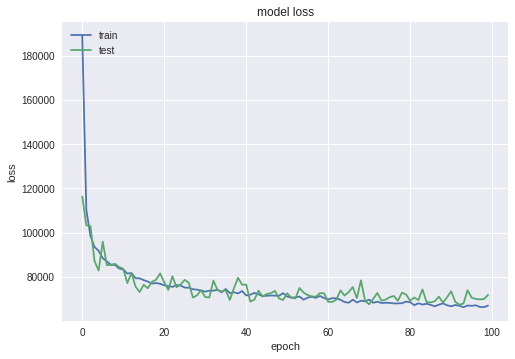

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

maxscaler = MinMaxScaler()

x_train = maxscaler.fit_transform(x_train)

model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape=(19,)))
model.add(Dense(16))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256))
model.add(Dense(512))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 100
BATCH_SIZE = 10

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)

Train on 11584 samples, validate on 2896 samples
Epoch 1/100
11584/11584 [==============================] - 9s 753us/step - loss: 157927.8006 - val_loss: 120422.9020
Epoch 2/100
11584/11584 [==============================] - 8s 701us/step - loss: 117477.6776 - val_loss: 115095.2264
Epoch 3/100
11584/11584 [==============================] - 8s 700us/step - loss: 111837.7030 - val_loss: 106992.0556
Epoch 4/100
11584/11584 [==============================] - 8s 721us/step - loss: 108671.5538 - val_loss: 106288.5444
Epoch 5/100
11584/11584 [==============================] - 8s 722us/step - loss: 104957.2428 - val_loss: 101551.5142
Epoch 6/100
11584/11584 [==============================] - 9s 754us/step - loss: 102204.3440 - val_loss: 98738.0817
Epoch 7/100
11584/11584 [==============================] - 9s 753us/step - loss: 100381.0351 - val_loss: 112372.5894
Epoch 8/100
11584/11584 [==============================] - 9s 761us/step - loss: 100402.1424 - val_loss: 98482.2964
Epoch 9/100
11584

In [0]:
from sklearn.preprocessing import MaxAbsScaler
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

maxscaler = MaxAbsScaler()

x_train = maxscaler.fit_transform(x_train)

model = Sequential()
model.add(Dense(8,activation = 'relu',input_shape=(19,)))
model.add(Dense(16))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'sigmoid'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error')
NUM_EPOCHS = 100
BATCH_SIZE = 10

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE,
                    epochs = NUM_EPOCHS, validation_split = 0.2)

Train on 11584 samples, validate on 2896 samples
Epoch 1/100
11584/11584 [==============================] - 3s 280us/step - loss: 258802.3604 - val_loss: 216485.5197
Epoch 2/100
11584/11584 [==============================] - 3s 241us/step - loss: 220276.9866 - val_loss: 216738.4285
Epoch 3/100
11584/11584 [==============================] - 3s 239us/step - loss: 183969.1322 - val_loss: 162375.0776
Epoch 4/100
11584/11584 [==============================] - 3s 240us/step - loss: 150572.7074 - val_loss: 145778.3256
Epoch 5/100
11584/11584 [==============================] - 3s 240us/step - loss: 145679.3810 - val_loss: 142332.0486
Epoch 6/100
11584/11584 [==============================] - 3s 239us/step - loss: 143106.4094 - val_loss: 141136.9633
Epoch 7/100
11584/11584 [==============================] - 3s 240us/step - loss: 142566.5012 - val_loss: 140905.5493
Epoch 8/100
11584/11584 [==============================] - 3s 242us/step - loss: 140343.7721 - val_loss: 136763.7927
Epoch 9/100
115